# Time Series

- What are Time Series?
- Why classical regression techniques fail for forecasting
- Auto Regressive Integrated Moving Average
- Application of Fourier Series Techniques to determine Seasonality & Does Fourier Series Extrapolation Work?







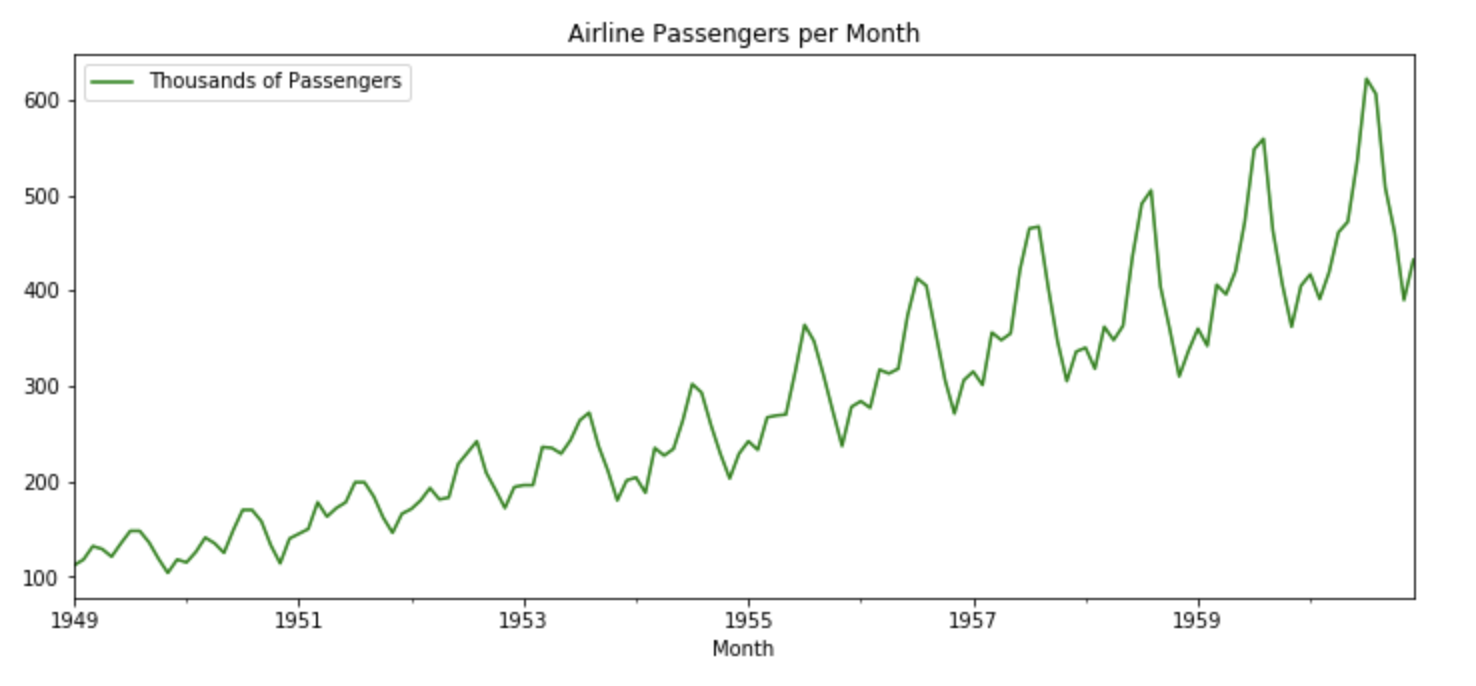




# ETS (Error, Trend, & Seasonality) Decomposition

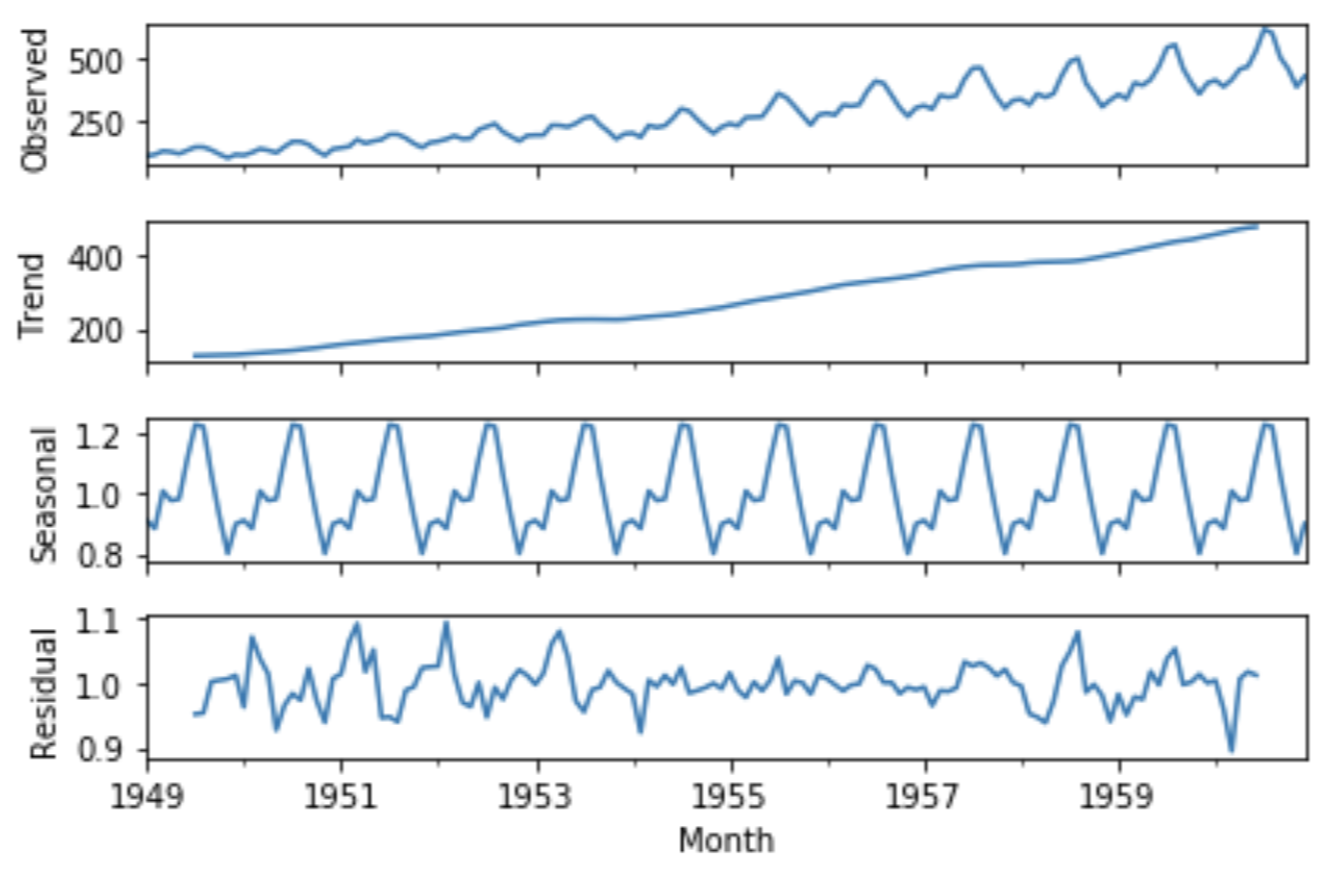

In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np

#import data
with open('temperatures.csv') as file:
    reader = csv.reader(file)
    header = next(reader)
    data = []
    for row in reader:
        data.append(row)
file.close()

In [3]:
#our data. minimum daily temperature over 10 years (3650 days) in Melbourne, Australia.
y = []
for i in range(3650):
    y.append(float(data[i][1]))

#create rolling average of y
rolly = []
for i in range(9):
    rolly.append(y[i])
for i in range(9,3640):
    rolly.append(0.1*(y[i]+y[i+1]+y[i+2]+y[i+3]+y[i+4]+y[i+5]+y[i+6]+y[i+7]+y[i+8]+y[i+9]))
for i in range(3640,3650):
    rolly.append(y[i])

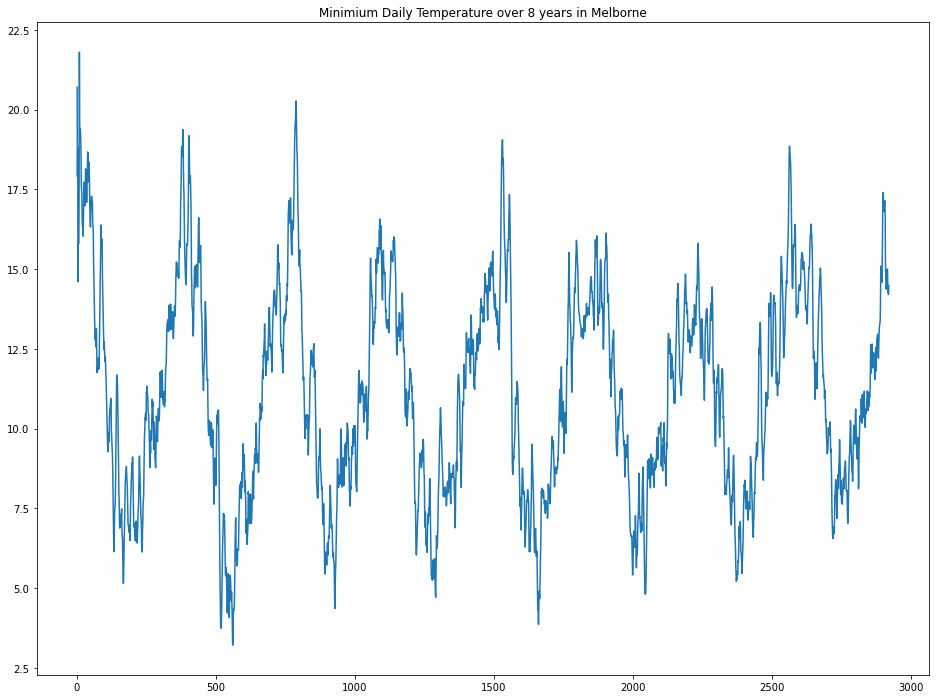

In [4]:
#plot 8 years of rolly (2920 days)

t = np.arange(1,3651)

plt.rcParams['figure.figsize'] = [16, 12]
plt.plot(t[0:2919],rolly[0:2919])
plt.title('Minimium Daily Temperature over 8 years in Melborne')
plt.show()

In [82]:
import numpy as np
import pylab as pl
from numpy import fft
    
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 10                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t


In [67]:
Fextra = fourierExtrapolation(np.array(rolly[0:2919]), 730)

In [101]:
F = fourierExtrapolation(np.array(rolly), 0)

In [97]:
  
def Fourier(t):
    sum = a[0]/2
    for i in range(1,3650):
        sum = sum +a[i]*np.cos(i*t)+b[i]*np.sin(i*t)
    return sum

Flist = []
for i in t:
    Flist.append(Fourier(i))

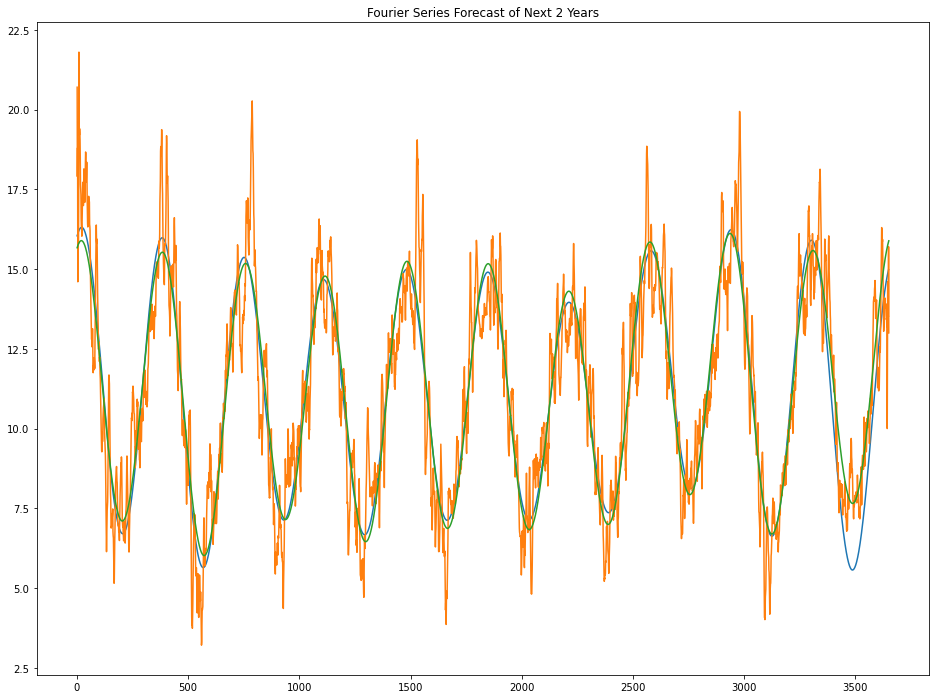

In [102]:
plt.plot(t[0:3649],Fextra)
plt.plot(t,rolly)
plt.plot(t,F)
plt.title('Fourier Series Forecast of Next 2 Years compared to smoothed')
plt.show()

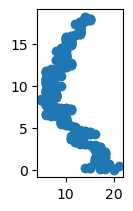

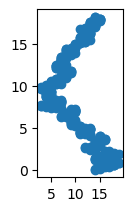

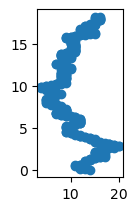

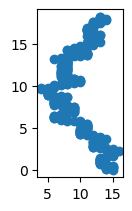

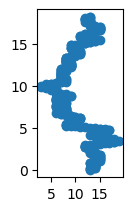

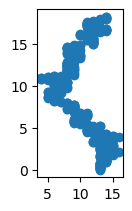

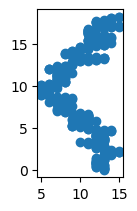

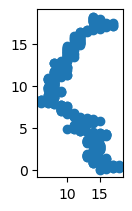

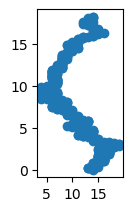

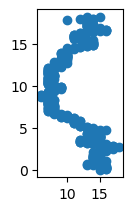

In [38]:
import matplotlib

matplotlib.style.use('default')

x1 = rolly[0:365]

for i in range(365):
    x1[i] = int(x1[i])
    
y1 = np.arange(1,366)/20

plt.subplot(2, 5, 1)
plt.scatter(x1,y1)
plt.show()


x2= rolly[365:730]
for i in range(365):
    x2[i] = int(x2[i])

plt.subplot(2, 5, 2)
plt.scatter(x2,y1)
plt.show()

x3=rolly[730:1095]
for i in range(365):
    x3[i]=int(x3[i])           

plt.subplot(2, 5, 3)
plt.scatter(x3,y1)
plt.show()

x4=rolly[1095:1460]
for i in range(365):
    x4[i]=int(x4[i])           

plt.subplot(2, 5, 4)
plt.scatter(x4,y1)
plt.show()


x5=rolly[1460:1825]
for i in range(365):
    x5[i]=int(x5[i])           

plt.subplot(2,5, 5)
plt.scatter(x5,y1)
plt.show()


x6=rolly[1825:2190]
for i in range(365):
    x6[i]=int(x6[i])           

plt.subplot(2, 5, 6)
plt.scatter(x6,y1)
plt.show()


x7=rolly[2190:2555]
for i in range(365):
    x7[i]=int(x7[i])           

plt.subplot(2, 5, 7)
plt.scatter(x7,y1)
plt.show()


x8=rolly[2555:2920]
for i in range(365):
    x8[i]=int(x8[i])           

plt.subplot(2, 5, 8)
plt.scatter(x8,y1)
plt.show()

x9=rolly[2920:3285]
for i in range(365):
    x9[i]=int(x9[i])           

plt.subplot(2, 5, 9)
plt.scatter(x9,y1)
plt.show()


x10=rolly[3285:3650]
for i in range(365):
    x10[i]=int(x10[i])           

plt.subplot(2, 5, 10)
plt.scatter(x10,y1)
plt.show()


In [114]:
pip install pyts

Note: you may need to restart the kernel to use updated packages.


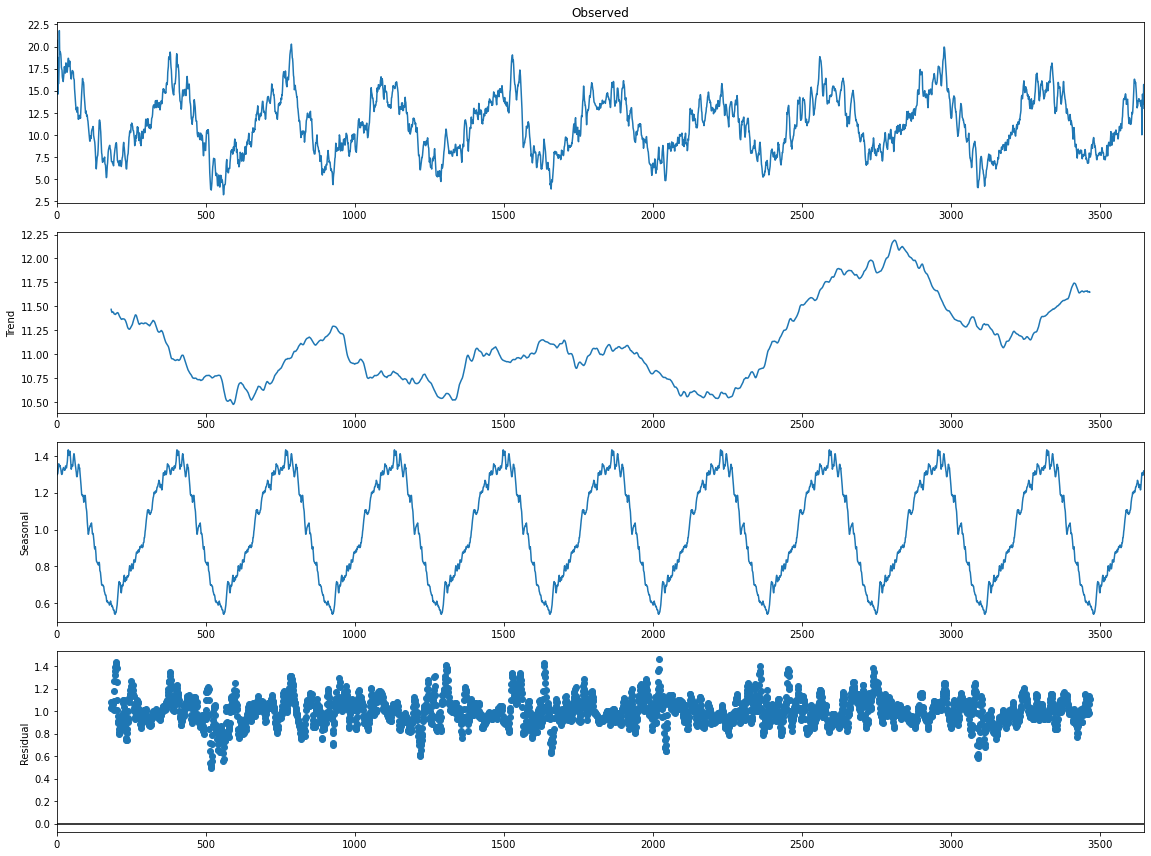

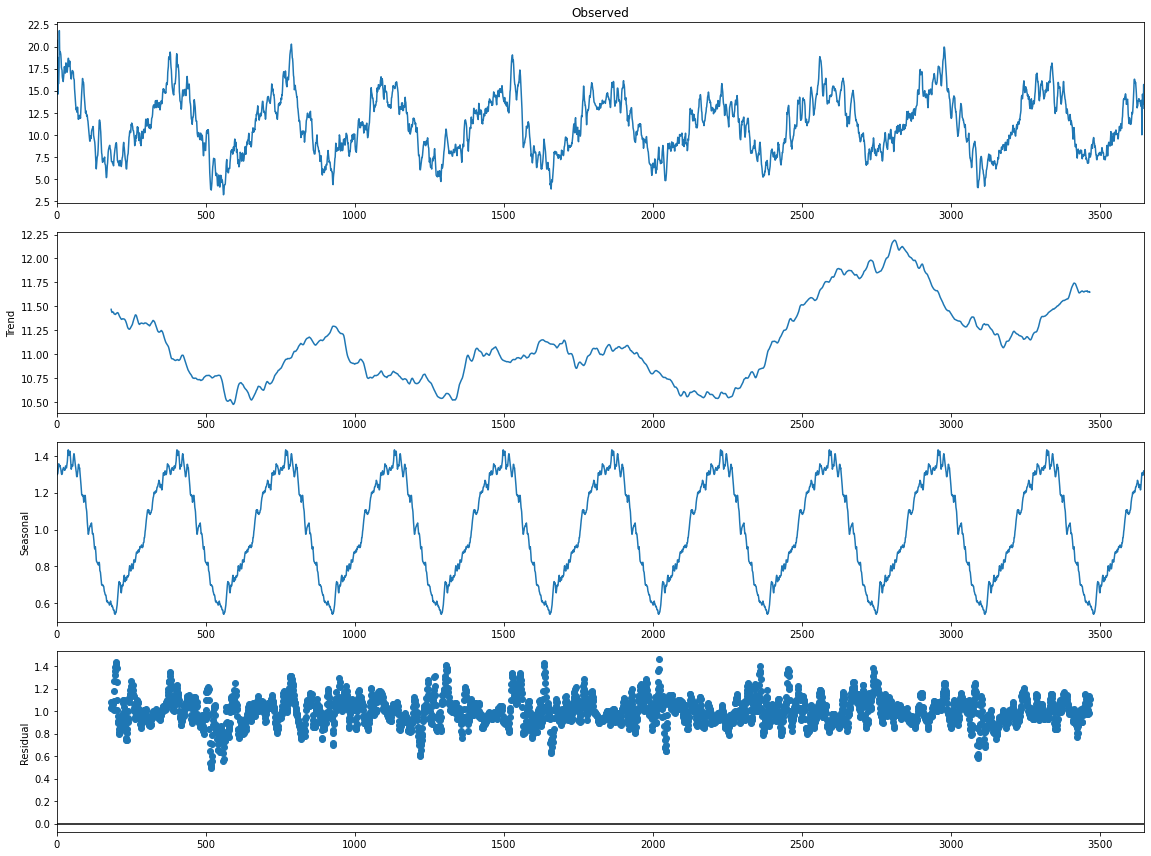

In [19]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# ETS Decomposition
result = seasonal_decompose(rolly, model ='multiplicative', period = 365)
  
# ETS plot 
result.plot()

# ARMA & ARIMA (Auto Regressive Integrated Moving Average)
    

AR Model of Order $p$:

$y_t = \beta_1y_{t-1}+\beta_2y_{t-2}+\cdots+\beta_py_{t-p}$

- linear regression model that predicts value of dependent variable based on past p values
- operates under the assumption that past values have an effect on future ones
- commonly used in analyzing time varying processes 


MA Model of Order $q$:

$y_t = \varepsilon_t + \alpha_1\varepsilon_{t-1}+\alpha_2\varepsilon_{t-2}+\cdots+\alpha_q\varepsilon_{t-q}$

- predicts value of dependent variable based on past q errors

# ARMA & ARIMA (Auto Regressive Integrated Moving Average)

Non-Stationary Series: Time Series which does not have a constant mean, variance, and autocorrelation

- future values of such series are understadably harder to predict


Integration of Order $d$

- subtraction of the current values of a series with its previous values d times.
- used to transform non-stationary series




ARMA = AR+MA

ARIMA = AR + I + MA

# Auto Correllation Function (ACF) & Partial ACF


ACF:
 - corellation between observations at the current point in time with past observations 
 - can be used to determine optimal MA model order.
 

PACF
 - used to determine optimal AR order

In [50]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(rolly, nlags = 20)

lag_pacf = pacf(rolly, nlags = 20, method = 'ols')

#this is not working in jupyter for some reason. I will fix it or just delete this section

ImportError: cannot import name 'Literal' from 'statsmodels.compat.python' (C:\Users\Danii\anaconda3\lib\site-packages\statsmodels\compat\python.py)